In [ ]:
"""
Created on Thu August-20-2020 at 15:14:36
@author: Sarthak Jagdale


"""
"""
DocString:
A) Introduction:
    This code is written for analyzing total cases, stateswise testing, finding correlation between 
    various factors and total cases. 
    
    This code has a 5 parts
    1> Null Value removal 
    2> Descriptive statistics
    3> Plotting values  
    4> Correaltion
    5> Infomative Scikit-learn 

B) Bugs : 
    ->  There are no Bugs in the Code. 

"""

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [187]:
#df = pd.read_excel(io=file_name, sheet_name=sheet)
filename = "Covid-19 India data set (version 1).xlsx"
sheet1 = 1
sheet2 = 2
sheet3 = 3
sheet4 = 4
#Covid 19 Cases in India
covid_19=pd.read_excel(io=filename,  sheet_name=sheet1)

#Hopital Beds availablity data in India
beds = pd.read_excel(io=filename,  sheet_name=sheet2)

#India's Population
pop = pd.read_excel(io=filename,  sheet_name=sheet3)

#Statewise testing data 
testing = pd.read_excel(io=filename,  sheet_name=sheet4)

In [188]:
covid_19.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,18:00:00,Kerala,1,0,0.0,0.0,1
1,2.0,2020-01-31,18:00:00,Kerala,1,0,0.0,0.0,1
2,3.0,2020-02-01,18:00:00,Kerala,2,0,0.0,0.0,2
3,4.0,2020-02-02,18:00:00,Kerala,3,0,0.0,0.0,3
4,5.0,2020-02-03,18:00:00,Kerala,3,0,0.0,0.0,3


In [189]:
beds.head(36)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [190]:
  pop.head(36).sort_values(by = ['State / Union Territory'], axis=0, ascending=True)

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
33,34,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
9,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
25,26,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
14,15,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
31,32,Chandigarh,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
16,17,Chhattisgarh,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
32,33,Dadra and Nagar Haveli and Daman and Diu,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
28,29,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
24,25,Goa,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [191]:
testing.head()

,Date,State,TotalSamples,Positive,Negative
0,2020-04-17,Andaman and Nicobar Islands,1403,12.0,1391.0
1,2020-04-24,Andaman and Nicobar Islands,2679,27.0,2652.0
2,2020-04-27,Andaman and Nicobar Islands,2848,33.0,2815.0
3,2020-05-01,Andaman and Nicobar Islands,3754,33.0,3721.0
4,2020-05-16,Andaman and Nicobar Islands,6677,33.0,6644.0


In [192]:
covid_19.isnull().sum()

Sno                         1
Date                        1
Time                        1
State/UnionTerritory        1
ConfirmedIndianNational     1
ConfirmedForeignNational    1
Cured                       1
Deaths                      1
Confirmed                   0
dtype: int64

In [193]:
beds.isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [194]:
pop.isnull().sum()

Sno                        0
State / Union Territory    0
Population                 0
Rural population           0
Urban population           0
Area                       0
Density                    0
Gender Ratio               0
dtype: int64

In [195]:
testing.isnull().sum()

Date             0
State            0
TotalSamples     0
Positive        14
Negative         1
dtype: int64

In [196]:
testing.head()

,Date,State,TotalSamples,Positive,Negative
0,2020-04-17,Andaman and Nicobar Islands,1403,12.0,1391.0
1,2020-04-24,Andaman and Nicobar Islands,2679,27.0,2652.0
2,2020-04-27,Andaman and Nicobar Islands,2848,33.0,2815.0
3,2020-05-01,Andaman and Nicobar Islands,3754,33.0,3721.0
4,2020-05-16,Andaman and Nicobar Islands,6677,33.0,6644.0


In [197]:
print("number of NaN values for the column:", beds['NumSubDistrictHospitals_HMIS'].isnull().sum())

number of NaN values for the column: 7


In [198]:
mean1 = beds['NumSubDistrictHospitals_HMIS'].mean()
beds['NumSubDistrictHospitals_HMIS'].replace(np.nan, mean1, inplace = True)

In [199]:
print("number of NaN values for the column:", beds['NumSubDistrictHospitals_HMIS'].isnull().sum())

number of NaN values for the column: 0


In [200]:
mean2 = testing['Positive'].mean()
testing['Positive'].replace(np.nan, mean2, inplace = True)

In [201]:
print("number of NaN values for the column:", testing['Positive'].isnull().sum())

number of NaN values for the column: 0


In [202]:
mean3 = testing['Negative'].mean()
testing['Negative'].replace(np.nan, mean3, inplace = True)

In [203]:
print("number of NaN values for the column:", testing['Negative'].isnull().sum())

number of NaN values for the column: 0


In [204]:
testing['State'].value_counts()

Kerala                                      125
Odisha                                      121
West Bengal                                 121
Haryana                                     120
Rajasthan                                   120
Madhya Pradesh                              120
Karnataka                                   119
Uttarakhand                                 119
Uttar Pradesh                               119
Punjab                                      119
Tamil Nadu                                  119
Maharashtra                                 119
Delhi                                       117
Bihar                                       117
Gujarat                                     117
Jammu and Kashmir                           117
Himachal Pradesh                            116
Chandigarh                                  116
Andhra Pradesh                              116
Nagaland                                    114
Mizoram                                 

In [205]:
covid_19.describe()

,Sno,Cured,Deaths,Confirmed
count,4846.000000,4846.000000,4846.000000,4.847000e+03
mean,2423.500000,6503.380726,282.182212,2.177078e+04
std,1399.064032,21762.767123,1167.320531,7.585008e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1212.250000,8.000000,0.000000,4.100000e+01
50%,2423.500000,188.000000,4.000000,6.590000e+02
75%,3634.750000,2681.000000,65.000000,5.496000e+03
max,4846.000000,287030.000000,15842.000000,5.276148e+07


In [206]:
beds.describe()

,Sno,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,830.527778,154.666667,43.275862,27.861111,1047.916667,20528.444444,550.277778,7766.333333,104.777778,11977.027778
std,10.535654,906.911792,178.379531,55.824673,30.857417,1122.109273,22563.597553,862.228727,9955.553646,129.946387,15086.566553
min,1.000000,4.000000,2.000000,1.000000,1.000000,8.000000,250.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,81.500000,15.250000,11.250000,9.000000,107.250000,2640.000000,23.750000,623.500000,13.250000,1369.750000
50%,18.500000,518.500000,80.500000,38.137931,21.500000,677.000000,12434.500000,240.500000,5735.000000,57.500000,5085.000000
75%,27.250000,1384.750000,212.500000,47.000000,35.500000,1816.000000,38482.750000,695.250000,10251.000000,128.750000,17198.250000
max,36.000000,3277.000000,671.000000,310.000000,174.000000,4122.000000,72616.000000,4442.000000,40179.000000,525.000000,58882.000000


In [207]:
pop.describe()

,Sno,Population,Rural population,Urban population,Gender Ratio
count,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,36.000000
mean,18.500000,3.362689e+07,2.315336e+07,1.047353e+07,937.583333
std,10.535654,4.305758e+07,3.212429e+07,1.312631e+07,65.544478
min,1.000000,6.447300e+04,1.414100e+04,5.033200e+04,711.000000
25%,9.750000,1.439840e+06,5.451570e+05,6.652765e+05,907.750000
50%,18.500000,2.106970e+07,1.278679e+07,5.167890e+06,947.000000
75%,27.250000,5.229275e+07,3.496766e+07,1.604342e+07,976.750000
max,36.000000,1.998123e+08,1.553173e+08,5.081826e+07,1084.000000


In [208]:
testing.describe()

,TotalSamples,Positive,Negative
count,3.780000e+03,3780.000000,3.780000e+03
mean,2.199296e+05,13741.470260,2.062894e+05
std,3.707076e+05,39462.573668,3.408445e+05
min,5.800000e+01,0.000000,5.700000e+01
25%,1.210975e+04,173.000000,1.188350e+04
50%,5.781500e+04,1396.500000,5.630950e+04
75%,2.709585e+05,8937.000000,2.570562e+05
max,2.837273e+06,457476.000000,2.574051e+06


In [209]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       4846 non-null   float64       
 1   Date                      4846 non-null   datetime64[ns]
 2   Time                      4846 non-null   object        
 3   State/UnionTerritory      4846 non-null   object        
 4   ConfirmedIndianNational   4846 non-null   object        
 5   ConfirmedForeignNational  4846 non-null   object        
 6   Cured                     4846 non-null   float64       
 7   Deaths                    4846 non-null   float64       
 8   Confirmed                 4847 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 340.9+ KB


In [210]:
beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               36 non-null     int64  
 1   State/UT                          36 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      36 non-null     int64  
 3   NumCommunityHealthCenters_HMIS    36 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      36 non-null     float64
 5   NumDistrictHospitals_HMIS         36 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  36 non-null     int64  
 7   NumPublicBeds_HMIS                36 non-null     int64  
 8   NumRuralHospitals_NHP18           36 non-null     int64  
 9   NumRuralBeds_NHP18                36 non-null     int64  
 10  NumUrbanHospitals_NHP18           36 non-null     int64  
 11  NumUrbanBeds_NHP18                36 non-null     int64  
dtypes: float64

In [211]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


In [212]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3780 non-null   datetime64[ns]
 1   State         3780 non-null   object        
 2   TotalSamples  3780 non-null   int64         
 3   Positive      3780 non-null   float64       
 4   Negative      3780 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 147.8+ KB


In [213]:
covid_19_r = covid_19.drop(['Sno'], axis=1)

#Hopital Beds availablity data in India
bed_r = beds.drop(['Sno'], axis=1).sort_values(by = ['State/UT'])

#India's Population
pop_r = pop.drop(['Sno'], axis=1).sort_values(by = ['State / Union Territory'])

#Statewise testing data 


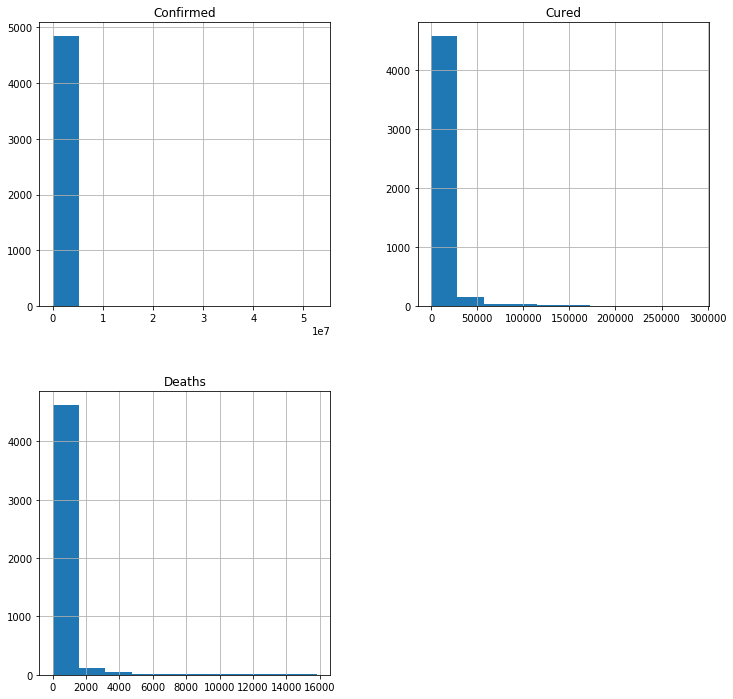

In [214]:
covid_19_r.hist(figsize=(12,12))
plt.show()

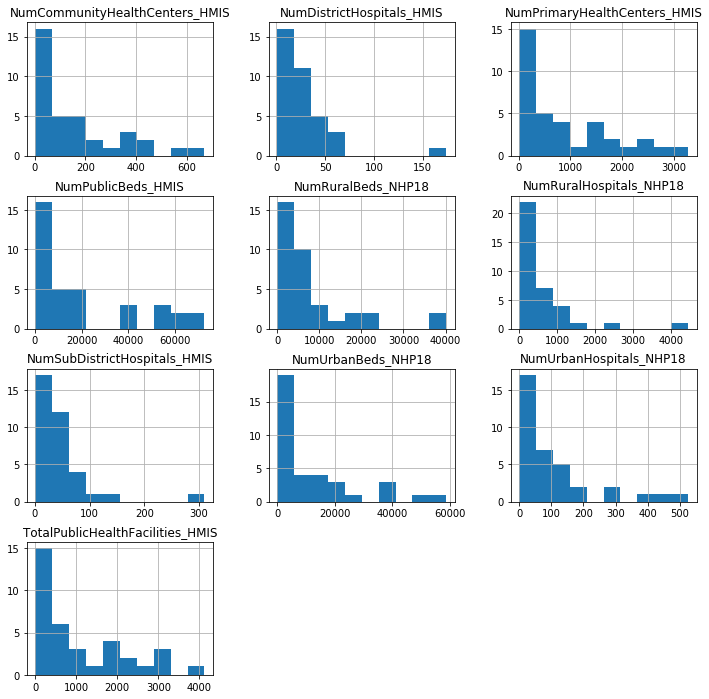

In [215]:
bed_r.hist(figsize=(12,12))
plt.show()

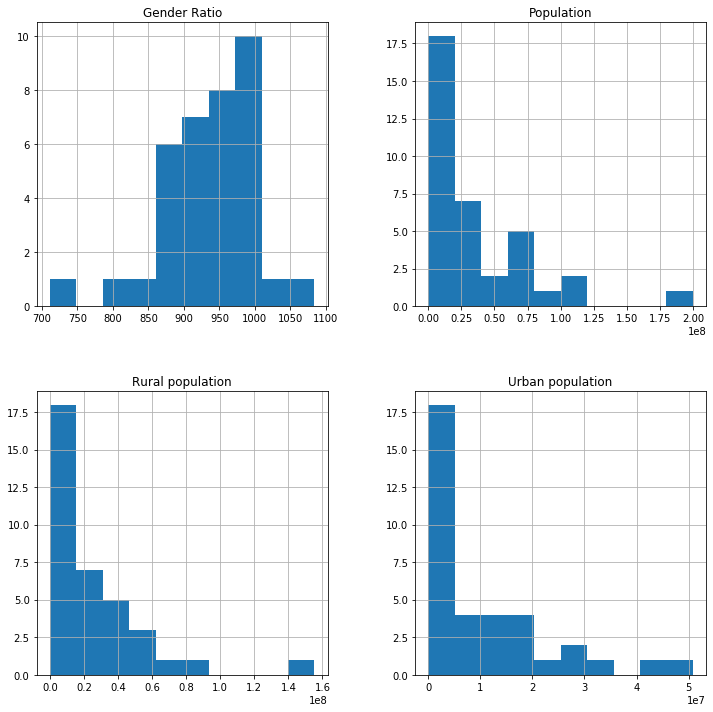

In [234]:
pop_r.hist(figsize=(12,12))
plt.show()

In [217]:
pop_r.head()

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
33,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
9,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
25,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
14,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918


In [218]:
bed_r.head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,43.275862,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.000000,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,43.275862,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.000000,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.000000,43,2146,17796,930,6083,103,5936


In [219]:
values1 = bed_r[['State/UT', 'NumPrimaryHealthCenters_HMIS', 'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS', 'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS', 'NumPublicBeds_HMIS' ,'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18', 'NumUrbanHospitals_NHP18','NumUrbanBeds_NHP18' ]]
values2 = pop_r[['State / Union Territory', 'Population', 'Rural population', 'Urban population','Area', 'Density', 'Gender Ratio']]

In [220]:
df_covid = pd.concat([values1, values2])

In [221]:
#df_covid.to_excel('covid_19_consolidated.xlsx')

In [222]:
covid_BedVsPopVsCases = pd.read_excel('covid_19_consolidated.xlsx')

In [223]:
covid_BedVsPopVsCases=covid_BedVsPopVsCases.drop(['Unnamed: 0'], axis=1)

In [224]:
covid_BedVsPopVsCases.head()

,State/UT,Total Samples,Positive Cases,Negative Cases,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Population,Rural population,Urban population,Gender Ratio
0,Andaman & Nicobar Islands,24580,830,23750,27,4,83.666667,3,34,1246,27,575,3,500,380581,237093,143488,876
1,Andhra Pradesh,2110923,166586,1944337,1417,198,31.000000,20,1666,60799,193,6480,65,16658,49577103,34966693,14610410,993
2,Arunachal Pradesh,91227,1758,89469,122,62,83.666667,15,199,2320,208,2136,10,268,1383727,1066358,317369,938
3,Assam,1006457,45275,961182,1007,166,14.000000,33,1220,19115,1176,10944,50,6198,31205576,26807034,4398542,954
4,Bihar,648939,59328,589611,2007,63,33.000000,43,2146,17796,930,6083,103,5936,104099452,92341436,11758016,918


In [225]:
covid_BedVsPopVsCases.corr()

,Total Samples,Positive Cases,Negative Cases,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Population,Rural population,Urban population,Gender Ratio
Total Samples,1.000000,0.699724,0.996003,0.824740,0.760059,0.587149,0.091742,0.145007,0.901597,0.162833,0.820257,0.050652,0.038939,0.704731,0.643107,0.718692,-0.070797
Positive Cases,0.699724,1.000000,0.633119,0.569170,0.417832,0.489045,-0.083542,-0.031102,0.738513,-0.089924,0.415990,-0.091211,-0.102135,0.370730,0.252805,0.590465,0.001637
Negative Cases,0.996003,0.633119,1.000000,0.822434,0.771273,0.575026,0.109845,0.161001,0.884536,0.187669,0.836727,0.066284,0.054959,0.717215,0.665190,0.704870,-0.076912
NumPrimaryHealthCenters_HMIS,0.824740,0.569170,0.822434,1.000000,0.873355,0.436193,-0.040053,0.024957,0.883494,0.072373,0.806661,-0.089019,-0.100452,0.781153,0.774949,0.654658,-0.108158
NumCommunityHealthCenters_HMIS,0.760059,0.417832,0.771273,0.873355,1.000000,0.393200,-0.036086,0.017916,0.813248,0.061496,0.819242,-0.086575,-0.096647,0.725872,0.708020,0.637574,-0.154781
NumSubDistrictHospitals_HMIS,0.587149,0.489045,0.575026,0.436193,0.393200,1.000000,0.006293,0.051361,0.580458,0.052721,0.694664,0.004473,-0.006640,0.277807,0.185774,0.449126,0.145187
NumDistrictHospitals_HMIS,0.091742,-0.083542,0.109845,-0.040053,-0.036086,0.006293,1.000000,0.993889,-0.117671,0.981237,-0.085069,0.991072,0.992683,0.165490,0.086655,0.271531,-0.033400
TotalPublicHealthFacilities_HMIS,0.145007,-0.031102,0.161001,0.024957,0.017916,0.051361,0.993889,1.000000,-0.051640,0.981323,-0.036437,0.992615,0.991885,0.200699,0.116708,0.313048,-0.032950
NumPublicBeds_HMIS,0.901597,0.738513,0.884536,0.883494,0.813248,0.580458,-0.117671,-0.051640,1.000000,-0.044034,0.824122,-0.151211,-0.163983,0.604491,0.549597,0.631763,-0.084314
NumRuralHospitals_NHP18,0.162833,-0.089924,0.187669,0.072373,0.061496,0.052721,0.981237,0.981323,-0.044034,1.000000,0.037557,0.966833,0.966689,0.261486,0.193097,0.325944,-0.031515


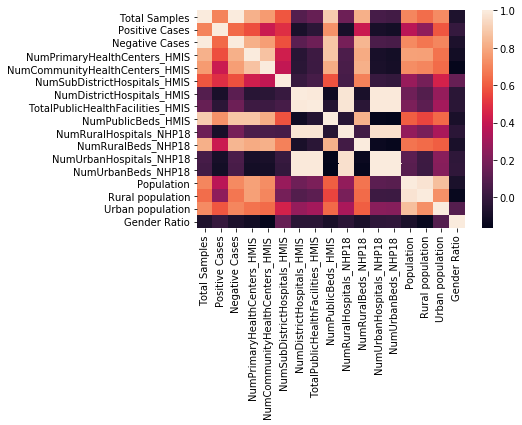

In [226]:
sns.heatmap(covid_BedVsPopVsCases.corr())

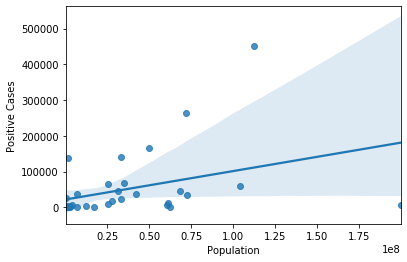

In [227]:

sns.regplot("Population", "Positive Cases", data=covid_BedVsPopVsCases)

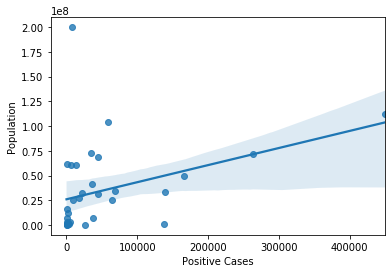

In [228]:
sns.regplot("Positive Cases", "Population", data=covid_BedVsPopVsCases)

In [229]:
for val in covid_BedVsPopVsCases:
    print(val)

State/UT
Total Samples
Positive Cases
Negative Cases
NumPrimaryHealthCenters_HMIS
NumCommunityHealthCenters_HMIS
NumSubDistrictHospitals_HMIS
NumDistrictHospitals_HMIS
TotalPublicHealthFacilities_HMIS
NumPublicBeds_HMIS
NumRuralHospitals_NHP18
NumRuralBeds_NHP18
NumUrbanHospitals_NHP18
NumUrbanBeds_NHP18
Population
Rural population
Urban population
Gender Ratio


In [230]:
for val in covid_BedVsPopVsCases:
    print(f"covid_BedVsPopVsCases['{val}'],")

covid_BedVsPopVsCases['State/UT'],
covid_BedVsPopVsCases['Total Samples'],
covid_BedVsPopVsCases['Positive Cases'],
covid_BedVsPopVsCases['Negative Cases'],
covid_BedVsPopVsCases['NumPrimaryHealthCenters_HMIS'],
covid_BedVsPopVsCases['NumCommunityHealthCenters_HMIS'],
covid_BedVsPopVsCases['NumSubDistrictHospitals_HMIS'],
covid_BedVsPopVsCases['NumDistrictHospitals_HMIS'],
covid_BedVsPopVsCases['TotalPublicHealthFacilities_HMIS'],
covid_BedVsPopVsCases['NumPublicBeds_HMIS'],
covid_BedVsPopVsCases['NumRuralHospitals_NHP18'],
covid_BedVsPopVsCases['NumRuralBeds_NHP18'],
covid_BedVsPopVsCases['NumUrbanHospitals_NHP18'],
covid_BedVsPopVsCases['NumUrbanBeds_NHP18'],
covid_BedVsPopVsCases['Population'],
covid_BedVsPopVsCases['Rural population'],
covid_BedVsPopVsCases['Urban population'],
covid_BedVsPopVsCases['Gender Ratio'],


In [231]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(covid_BedVsPopVsCases['Total Samples'], covid_BedVsPopVsCases['Positive Cases'], covid_BedVsPopVsCases['Urban population'], covid_BedVsPopVsCases['TotalPublicHealthFacilities_HMIS'])
print("The value from the Stats is given below:")
print("The F value is:", fvalue," The Pvalue is:", pvalue)

The value from the Stats is given below:
The F value is: 22.647575259851166  The Pvalue is: 6.832450353949321e-12


In [232]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(covid_BedVsPopVsCases.reset_index(), id_vars=['index'], value_vars=['Total Samples', 'Positive Cases', 'Urban population',  'TotalPublicHealthFacilities_HMIS'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n\t\tAnova table:")
anova_table



		Anova table:


,sum_sq,df,F,PR(>F)
C(treatments),3.001662e+15,3.0,22.647575,6.832450e-12
Residual,5.831668e+15,132.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

In [233]:
X = covid_BedVsPopVsCases[["Total Samples"]]
Y = covid_BedVsPopVsCases[['Positive Cases']]
lm = LinearRegression(X,Y)
lm.fit(X, Y)



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sns.boxplot('Urban', 'Positive Cases', data = covid_BedVsPopVsCases)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import data from csv file and store it into a variable



x = data.iloc[:,2]
y = data.iloc[:,4]

reg = LinearRegression(x,y)
reg.fit (x,y)